In [2]:
import json
import glob
import os
import shutil
os.getcwd()

'C:\\Users\\Ashwin\\Desktop\\htic\\Nuclei'

In [3]:
import geojson
import cv2
from matplotlib import pyplot as plt
%matplotlib inline  

In [ ]:
name_mapping = {}

if True:
    imagedirs=glob.glob('stage 1/train/train*')
    
    #print(imagedirs)
    newname = 0
    outdir = 'renamed'
    if not os.path.exists(outdir):
        os.mkdir(outdir)

    for dname in imagedirs:
        imgloc = glob.glob(dname+'/images/*.png')
        #print(imgloc)
        #shutil.copy(imgloc[0],outdir+'/train_'+str(newname)+'.png')
       
        name_mapping[imgloc[0]]=newname
        newname = newname + 1



In [ ]:
print(name_mapping)

In [ ]:
import re
#for imgloc in name_mapping.keys():
    #newname = name_mapping[imgloc]
    
    
gtmasks = glob.glob('masks1/*.png')
    
#     f=open("C:/Users/Ashwin/Desktop/htic/Nuclei/json/train_"+str(newname)+".json","wt")

for maskfile in gtmasks:
    features = []
    json_path = 'C:/Us'
    maskfile_name = os.path.basename(maskfile)
    jsonfile_name = maskfile_name.replace('.png','.json')
    json_name = os.path.join(json_path,jsonfile_name)
        
    
    maskim3 = cv2.imread(maskfile)
        
    tmp = maskim3[:,:,0].copy()
    _, contours, hierarchy = cv2.findContours(tmp, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        
        
    for ci in contours:
        coords = []
        for pt in ci:
            pt=pt.flatten().tolist()
            coords.append(pt)
              
        coords.append(coords[0])
            
        gj = geojson.Polygon(coordinates=coords)
          
        features.append(gj)
        
    
    with open(json_name,'wt') as f:
        json.dump(features,f)
        f.close()
            
            
        

    

In [ ]:


import numpy
for imgno in range(2,3):
    plt.figure(imgno)
    img=cv2.imread('renamed/train_0'+'.png')
    annot=open("json/train_0"+".json")
    b= geojson.load(annot)
    plt.imshow(img)
    plt.hold(True)
    for i in b:
        cc = numpy.array(i.coordinates)
        plt.plot(cc[:,0],cc[:,1])
        plt.hold(True)
        


In [10]:
from PIL import ImageDraw
import numpy
def poly2mask(gjcoord, maskimg,color=255):
    cc = numpy.array(gjcoord).ravel().tolist()
    #print(cc)
    ImageDraw.Draw(maskimg).polygon(cc,outline=color,fill=1)
    return maskimg
imgdir=glob.glob("renamed/*.png")
#os.mkdir("mask1")
for image in imgdir:
    imagename=os.path.basename(image)
    jsonfilename = (os.path.basename(image)).replace('png','json')

    annot = geojson.load(open("json/"+jsonfilename))

    print(jsonfilename)
    img = cv2.imread(image)
    #im = Image.open(image)
    rows = img.shape[0]
    cols = img.shape[1]

    #mask = Image.fromarray(numpy.zeros((rows,cols),numpy.uint8))
    mask = Image.new("L",(cols,rows),0)
    for cc in annot:
        mask = poly2mask(cc.coordinates, mask)

    mask = numpy.array(mask)
    mask = numpy.dstack((mask,mask,mask))

    cv2.imwrite("mask1/"+imagename,mask)
 

train_0.json
train_1.json
train_10.json
train_100.json
train_101.json
train_102.json
train_103.json
train_104.json
train_105.json
train_106.json
train_107.json
train_108.json
train_109.json
train_11.json
train_110.json
train_111.json
train_112.json
train_113.json
train_114.json
train_115.json
train_116.json
train_117.json
train_118.json
train_119.json
train_12.json
train_120.json
train_121.json
train_122.json
train_123.json
train_124.json
train_125.json
train_126.json
train_127.json
train_128.json
train_129.json
train_13.json
train_130.json
train_131.json
train_132.json
train_133.json
train_134.json
train_135.json
train_136.json
train_137.json
train_138.json
train_139.json
train_14.json
train_140.json
train_141.json
train_142.json
train_143.json
train_144.json
train_145.json
train_146.json
train_147.json
train_148.json
train_149.json
train_15.json
train_150.json
train_151.json
train_152.json
train_153.json
train_154.json
train_155.json
train_156.json
train_157.json
train_158.json
train

train_595.json
train_596.json
train_597.json
train_598.json
train_599.json
train_6.json
train_60.json
train_600.json
train_601.json
train_602.json
train_603.json
train_604.json
train_605.json
train_606.json
train_607.json
train_608.json
train_609.json
train_61.json
train_610.json
train_611.json
train_612.json
train_613.json
train_614.json
train_615.json
train_616.json
train_617.json
train_618.json
train_619.json
train_62.json
train_620.json
train_621.json
train_622.json
train_623.json
train_624.json
train_625.json
train_626.json
train_627.json
train_628.json
train_629.json
train_63.json
train_630.json
train_631.json
train_632.json
train_633.json
train_634.json
train_635.json
train_636.json
train_637.json
train_638.json
train_639.json
train_64.json
train_640.json
train_641.json
train_642.json
train_643.json
train_644.json
train_645.json
train_646.json
train_647.json
train_648.json
train_649.json
train_65.json
train_650.json
train_651.json
train_652.json
train_653.json
train_654.json
tra

In [ ]:
plt.imshow(mask)

In [ ]:
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client.coord_db
collection = db['coord_coll']

import json
imgno=0;
gtmasks = glob.glob('masks1/*.png')

for maskfile in gtmasks:
    
    json_path = 'C:/Users/Ashwin/Desktop/htic/Nuclei/json'
    maskfile_name = os.path.basename(maskfile)
    jsonfile_name = maskfile_name.replace('.png','.json')
    json_name = os.path.join(json_path,jsonfile_name)
    json_file = open(json_name,"r")
    parsed = json.loads(json_file.read())
    for record in parsed:
        record.update({u'img':os.path.splitext(maskfile_name)[0]})
    for item in parsed:
        collection.insert(item)
    #for item in collection.find():
        #print(item)

   

In [ ]:
import cv2
imgno=0
for imgno in range(0,669):
    img=cv2.imread("C:/Users/Ashwin/Desktop/htic/Nucleii deduction/renamed/train_"+str(imgno)+".png")
    image=cv2.resize(img,int(250),int(250))
    print(img.shape)

In [ ]:
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client.a


In [ ]:
print(img1.shape)

In [10]:
from __future__ import print_function
from skimage import io
from skimage.util import view_as_windows
import os
import numpy as np
from tqdm import tqdm
import argparse
import glob


img_folder = "C:/Users/Ashwin/Desktop/htic/Nuclei/testg"
    # img_folder = '/media/balamurali/NewVolume2/Deep_network/mitosis'
out_folder = "C:/Users/Ashwin/Desktop/htic/Nuclei/test1"
    # out_folder = '/media/balamurali/NewVolume2/Deep_network/mitosis/output'
img_ext    = "png"
img_size   = (256,256)

img_stride = (32,32)
    
stride_list = []
window_shape_list = []
for each in img_size:
    window_shape_list.append((each))
        
for each in img_stride:
    stride_list.append(each)


print ("Settings: \nInput Folder:{}\nOutput Folder:{}\nImg ext:{}\nImg size:{}\n".format(img_folder,out_folder,img_ext,window_shape_list))


imgs_path  = glob.glob(os.path.join(img_folder,'*.' + img_ext))    
for window_shape in tqdm(window_shape_list):
    print ("Window size : {}\n".format(window_shape))
        
    for stride in tqdm(stride_list):
        print ("Stride size : {}\n".format(stride))
                
        out_folder_temp = os.path.join(out_folder,'size_' + str(window_shape) + '_' + 'stride_' +str(stride))    
        
        if not os.path.exists(out_folder_temp):
            print ("Directory {} not found,creating one".format(out_folder_temp))
            os.mkdir(out_folder_temp)
        
        print ("Sampling images\n")
        for img_path in tqdm(imgs_path):
                # Read image
            img = io.imread(img_path)
            print (len(img.shape))
            if len(img.shape) == 3:
                r_channel = img[:,:,0]
                g_channel = img[:,:,1]
                b_channel = img[:,:,2]

                r_sample = view_as_windows(r_channel,window_shape,step=stride)
                g_sample = view_as_windows(g_channel,window_shape,step=stride)
                b_sample = view_as_windows(b_channel,window_shape,step=stride)
            else:
                r_sample = view_as_windows(img,window_shape,step=stride)

            no_of_rows = r_sample.shape[0]
            no_of_cols = r_sample.shape[1]
            cnt=0
            for row in tqdm(range(no_of_rows)):
                for col in tqdm(range(no_of_cols)):
                    if len(img.shape) == 3:
                        sample_r = r_sample[row,col]
                        sample_g = g_sample[row,col]
                        sample_b = b_sample[row,col]
                        img_sample = np.dstack((sample_r,sample_g,sample_b))
                        
                    else:
                        img_sample = r_sample[row,col]  
                        # print (img_sample.shape)c
                    cnt+=1
                    img_sample_path = (os.path.join(out_folder_temp,os.path.basename(img_path)[:-4] + '_'+str(cnt)+'.png')).format(cnt)
                    io.imsave(img_sample_path,img_sample)
                        # break
                    # break
                # break
            # break

Settings: 
Input Folder:C:/Users/Ashwin/Desktop/htic/Nuclei/testg
Output Folder:C:/Users/Ashwin/Desktop/htic/Nuclei/test1
Img ext:png
Img size:[256, 256]



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Window size : 256




  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Stride size : 32

Directory C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32 not found,creating one
Sampling images





  0%|                                                                                           | 0/56 [00:00<?, ?it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.46it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.34it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.07it/s]

  4%|██▉                                                                                | 2/56 [00:00<00:02, 19.28it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.56it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 35.39it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 41.78it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 11.73it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 41.78it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.52it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 18.92it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 22.79it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00,  9.37it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 33.80it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.55it/s]

 11%|████████▉                                                                          | 6/56 [00:01<00:14,  3.36it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 35.81it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 36.97it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 39.03it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 38.78it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.67it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.87it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 35.49it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 36.13it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 37.25it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 37.23it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.60it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 21%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.60it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.38it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 44.76it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\20_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)




 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 43.59it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\20_11.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: Us

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.51it/s]




 20%|████████████████                                                                  | 11/56 [00:12<00:50,  1.12s/it]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.57it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.14it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\23_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)




100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.28it/s]

 25%|████████████████████▌                                                             | 14/56 [00:12<00:37,  1.12it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 53.72it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.42it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.31it/s]

 29%|███████████████████████▍                                                          | 16/56 [00:12<00:31,  1.26it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.98it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.87it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 15.43it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.52it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 51.86it/s]



 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:00<00:00, 50.13it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.10it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.58it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 51.42it/s]



 85%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.39it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.32it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.57it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.43it/s]

 36%|█████████████████████████████▎                                                    | 20/56 [00:16<00:29,  1.21it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 82.79it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\3_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\3_11.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\3_12.png is a low contrast image
  warn('%s is a low 

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 47.00it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.74it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 39.58it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44.24it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 12.46it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 41.20it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 40.76it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 41.26it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.91it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.13it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 30.20it/s]



 69%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.33it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.44it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.32it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.96it/s]

 46%|██████████████████████████████████████                                            | 26/56 [00:23<00:27,  1.11it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\35_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)




 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 45.99it/s]



 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 27.85it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 29.96it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.22it/s]



  0%|                                

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 37.56it/s]


 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:03<00:00,  2.60it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 39.48it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 40.43it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.74it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.64it/s]




 48%|███████████████████████████████████████▌                                          | 27/56 [00:26<00:28,  1.00it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 37.48it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 33.99it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 34.28it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 33.58it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.32it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.11it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.71it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\38_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)




 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 38.56it/s]



 62%|███████████████████████████████████████████████████                                | 8/13 [00:00<00:00, 36.96it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.03it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.92it/s]



  0%|                                





 23%|███████████████████▏                                                               | 3/13 [00:00<00:00, 28.92it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\38_69.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\38_70.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\38_71.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\38_72.png is a low contrast image
  warn('%s is a low contrast image' % fnam

C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\38_108.png is a low contrast image
  warn('%s is a low contrast image' % fname)




 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 31.33it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\38_109.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\38_110.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\38_111.png is a low contrast image
  warn('%s is a low contrast image' % 

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 33.99it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 33.01it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 24.76it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 26.84it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:04,  1.87it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 21%|█████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 36.68it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 34.18it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 10.28it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 27.35it/s]






 33%|██████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.32it/s]






100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.11it/s]




 59%|████████████████████████████████████████████████▎                                 | 33/56 [00:41<00:28,  1.26s/it]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 21%|█████████████████▊                                                                 | 3/14 [00:00<00:00, 26.16it/s]



 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 26.98it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 29.15it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 30.65it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.15it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|█████

 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 34.38it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 34.24it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.97it/s]




 61%|█████████████████████████████████████████████████▊                                | 34/56 [00:46<00:29,  1.36s/it]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.64it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.66it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 34.57it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 36.24it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 10.39it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 31.66it/s]


 33%|██████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 35.49it/s]



 50%|█████████████████████████████████████████▌                                         | 7/14 [00:00<00:00, 31.19it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 30.48it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 28.71it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 28.77it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.01it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 29.78it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:00,  9.03it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 30.08it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00,  8.95it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|██████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.42it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.13it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 38.08it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 13.02it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 43.59it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.10it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 21%|█████████████████▊                                                                 | 3/14 [00:00<00:00, 27.34it/s]



 50%|█████████████████████████████████████████▌                                         | 7/14 [00:00<00:00, 32.34it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 36.57it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 37.33it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.60it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.14it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44.23it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.37it/s]

 79%|████████████████████████████████████████████████████████████████▍                 | 44/56 [00:58<00:15,  1.32s/it]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 36.80it/s]



 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 28.11it/s]



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:00<00:00, 33.73it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 35.36it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.48it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 43%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.42it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.39it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 34.57it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 34.57it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 37.56it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 37.63it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.65it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████

 50%|█████████████████████████████████████████▌                                         | 7/14 [00:00<00:00, 25.07it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 25.26it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 25.16it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 24.24it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.97it/s]




 84%|████████████████████████████████████████████████████████████████████▊             | 47/56 [01:06<00:12,  1.41s/it]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 21%|█████████████████▊                                                                 | 3/14 [00:00<00:00, 21.49it/s]



 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 22.87it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 21.00it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 24.81it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 26.39it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:04,  1.86it/s]



  0%|         





 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 17.75it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\59_117.png is a low contrast image
  warn('%s is a low contrast image' % fname)




 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 23.66it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 25.99it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 26.74it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.95it/s]




 86%|██████████████████████████████████████████████████████████████████████▎           | 48/56 [01:10<00:11,  1.48s/it]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 32.09it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 35.11it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 33.24it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 33.26it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.34it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.56it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.79it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.33it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 45.17it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 42.67it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.05it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.15it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 40.11it/s]



 77%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 36.46it/s]



 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 26.74it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 16.37it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 19.60it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 20.70it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:05,  1.46it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 41.43it/s]C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\64_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\64_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Ashwin\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: C:/Users/Ashwin/Desktop/htic/Nuclei/test1\size_256_stride_32\64_9.png is a low contrast image
  warn('%s is a low 

 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 42.49it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 44.96it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.11it/s]






 67%|████████████████████████████████████████████████████████                            | 6/9 [00:02<00:01,  2.44it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 37.49it/s]



 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 41.97it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.34it/s]


 78%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.65it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.28it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.86it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.80it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [01:26<00:00,  1.54s/it]


 50%|██████████████████████████████████████████                                          | 1/2 [01:26<01:26, 86.14s/it]

Stride size : 32

Sampling images





  0%|                                                                                           | 0/56 [00:00<?, ?it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.43it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.45it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.28it/s]

  4%|██▉                                                                                | 2/56 [00:00<00:03, 17.44it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.81it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.43it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:01,  4.92it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42.97it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.52it/s]


 33%|██████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 30.08it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:00,  8.57it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 45.58it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 36.68it/s]


 33%|██████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.77it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.96it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 34.28it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 38.08it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 40.69it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.82it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 38.20it/s]



 64%|█████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.57it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.65it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 32.09it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 37.60it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 40.34it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.75it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 48.67it/s]



 71%|█████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50.14it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.13it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 57.85it/s]



 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:00<00:00, 56.23it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 55.23it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:01,  4.13it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 48.21it/s]



 77%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.82it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.60it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.35it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.33it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.87it/s]

 25%|████████████████████▌                                                             | 14/56 [00:10<00:31,  1.32it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 60.16it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.29it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.14it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

 29%|███████████████████████▍                                                          | 16/56 [00:10<00:26,  1.49it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 57.85it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 54.70it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 16.85it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 55.70it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 50.56it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 41.61it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.12it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.09it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 15%|████████████▊                                                                      | 2/13 [00:00<00:00, 16.99it/s]



 38%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.81it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.10it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.56it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.34it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 96.42it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 95.15it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:01,  6.96it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 87.62it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 86.90it/s]


 22%|██████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.86it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.53it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44.90it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44.90it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 13.64it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42.37it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 46.85it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 44.96it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.59it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.28it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 42.13it/s]



 77%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.34it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.39it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.78it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.56it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 53.72it/s]



 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:00<00:00, 51.30it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 50.13it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.74it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 47.75it/s]



 77%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 40.76it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 42.85it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 42.93it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.00it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 38.94it/s]



 64%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.50it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.92it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 23%|███████████████████▏                                                               | 3/13 [00:00<00:00, 27.10it/s]



 54%|████████████████████████████████████████████▋                                      | 7/13 [00:00<00:00, 30.92it/s]



 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:00<00:00, 34.77it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.94it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.62it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 31%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 34.57it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 36.13it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 38.68it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 38.67it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.67it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 21%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 39.07it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 35.39it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 11.39it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 35.81it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.35it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.46it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 38.20it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 36.80it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 36.24it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 35.63it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.48it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.81it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.50it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 39.07it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44.24it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 12.53it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 38.08it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 40.76it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 39.41it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 39.14it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 38.67it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.71it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42.37it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 40.11it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 12.46it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 39.58it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.34it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.87it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 38.07it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 39.58it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 11.87it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.31it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.38it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.87it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 42.85it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 17.84it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 21.40it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:05,  1.51it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 41.09it/s]



 71%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.56it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.34it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 54.69it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.17it/s]

 79%|████████████████████████████████████████████████████████████████▍                 | 44/56 [00:47<00:12,  1.08s/it]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 50%|█████████████████████████████████████████▌                                         | 7/14 [00:00<00:00, 61.03it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 56.92it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 56.15it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.92it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 55.70it/s]



 86%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.57it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.38it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 41.43it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 42.31it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 40.69it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.82it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 39.17it/s]



 50%|█████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 39.32it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 43.18it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 44.00it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.04it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 40.43it/s]



 71%|█████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 37.69it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 37.14it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 36.31it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 36.37it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.55it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.14it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.65it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.78it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.35it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 41.78it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 44.17it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.32it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.16it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 42.13it/s]



 77%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 47.30it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 42.97it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 40.99it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 40.22it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.80it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 35.81it/s]



 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 39.58it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 42.46it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.19it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 49.15it/s]



 85%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.57it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.65it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.42it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

 50%|█████████████████████████████████████████▌                                         | 1/2 [02:36<02:36, 156.40s/it]

Window size : 256




  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Stride size : 32

Sampling images





  0%|                                                                                           | 0/56 [00:00<?, ?it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.81it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.81it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]

  5%|████▍                                                                              | 3/56 [00:00<00:02, 21.80it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 28.38it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:00,  8.72it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 36.24it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00,  9.24it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|██████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 53.72it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.87it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 15.42it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42.97it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 54.69it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.43it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 40.11it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 43.98it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 44.85it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.11it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 40.11it/s]



 71%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.35it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.71it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 48.67it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 47.07it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 44.42it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.07it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 40.76it/s]



 71%|█████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.14it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.06it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 23%|███████████████████▏                                                               | 3/13 [00:00<00:00, 14.32it/s]



 54%|████████████████████████████████████████████▋                                      | 7/13 [00:00<00:00, 22.35it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 23.48it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 25.81it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:04,  1.95it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.13it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.65it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.77it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.57it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

 25%|████████████████████▌                                                             | 14/56 [00:10<00:31,  1.32it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 58.98it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.29it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.12it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.34it/s]

 29%|███████████████████████▍                                                          | 16/56 [00:10<00:26,  1.49it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.13it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 55.71it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 15.79it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 56.76it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 48.68it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 46.21it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.90it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.45it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 36.80it/s]



 69%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.13it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.98it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.11it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 92%|██████████████████████████████████████████████████████████████████████████▊      | 12/13 [00:00<00:00, 112.46it/s]



100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 105.99it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:01,  7.77it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 85%|████████████████████████████████████████████████████████████████████▌            | 11/13 [00:00<00:00, 101.19it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 96.56it/s]


 22%|██████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.14it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.32it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 45.57it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 41.78it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 13.46it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.51it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 43.98it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 43.78it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 43.59it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.27it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 48.21it/s]



 77%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.38it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.45it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.34it/s]

 46%|██████████████████████████████████████                                            | 26/56 [00:19<00:22,  1.32it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 53.24it/s]



 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:00<00:00, 49.91it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.64it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.65it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 53.72it/s]



 85%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 27.66it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 35.95it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 39.43it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.72it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 45.17it/s]



 64%|█████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.80it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 32.34it/s]



 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 37.29it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 38.34it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.89it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 38.94it/s]



 62%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 21%|█████████████████▊                                                                 | 3/14 [00:00<00:00, 26.39it/s]



 50%|█████████████████████████████████████████▌                                         | 7/14 [00:00<00:00, 29.62it/s]



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:00<00:00, 32.16it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 32.72it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.30it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 47.75it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 29.49it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 11.14it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 32.34it/s]


 33%|██████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.57it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.09it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 34.58it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 38.73it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 40.34it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.79it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 45.99it/s]



 71%|█████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.44it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.38it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 36.69it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 38.57it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 11.53it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 41.21it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 44.76it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 43.40it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 42.03it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.91it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 35.81it/s]



 64%|█████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 43.59it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44.89it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 13.19it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 34.18it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.57it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.10it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42.97it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 47.00it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 13.28it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 40.11it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.13it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 48.21it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 48.91it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 49.08it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.42it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 42.13it/s]



 71%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.34it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.71it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44.90it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.37it/s]

 79%|████████████████████████████████████████████████████████████████▍                 | 44/56 [00:45<00:12,  1.03s/it]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 57.30it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 57.30it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 57.06it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.98it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 50%|█████████████████████████████████████████▌                                         | 7/14 [00:00<00:00, 60.51it/s]



 93%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.42it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.70it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 31.83it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 35.03it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 38.34it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 38.56it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.70it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 37.48it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 34.57it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 37.67it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 37.33it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.61it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 21%|█████████████████▊                                                                 | 3/14 [00:00<00:00, 20.60it/s]



 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 22.87it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 24.26it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 25.22it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 25.62it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:04,  1.76it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.10it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.28it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.38it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.79it/s]

 91%|██████████████████████████████████████████████████████████████████████████▋       | 51/56 [01:00<00:05,  1.18s/it]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 32.88it/s]



 62%|███████████████████████████████████████████████████                                | 8/13 [00:00<00:00, 34.28it/s]



 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:00<00:00, 34.88it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.58it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.56it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 31%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 35.49it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 37.14it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 38.68it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 38.14it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.65it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 47.30it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 44.96it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 44.34it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.32it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 45.58it/s]



 77%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.35it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.38it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.42it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.39it/s]

 50%|██████████████████████████████████████████                                          | 1/2 [01:10<01:10, 70.14s/it]

Stride size : 32

Sampling images





  0%|                                                                                           | 0/56 [00:00<?, ?it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.81it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.10it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.38it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.81it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]

  5%|████▍                                                                              | 3/56 [00:00<00:02, 19.53it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 12.85it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.09it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:01,  5.12it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 37.14it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 61.39it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 60.16it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 18.07it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 60.16it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 53.72it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.92it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 39.79it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 41.10it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 43.19it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.01it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 37.84it/s]



 64%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.10it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.53it/s]

 14%|███████████▊                                                                       | 8/56 [00:05<00:32,  1.48it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 36.13it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 35.34it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 40.34it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.20it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 21%|█████████████████▊                                                                 | 3/14 [00:00<00:01, 10.48it/s]



 50%|█████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.59it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.34it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 51.86it/s]



 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:00<00:00, 51.64it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 50.92it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.83it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 54.20it/s]



 92%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.81it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.28it/s]

 21%|█████████████████▌                                                                | 12/56 [00:12<00:47,  1.08s/it]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.46it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.92it/s]

 23%|███████████████████                                                               | 13/56 [00:13<00:43,  1.01s/it]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.33it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.87it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 54.69it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.17it/s]

 27%|█████████████████████▉                                                            | 15/56 [00:13<00:36,  1.14it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.14it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.10it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 40.65it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 45.58it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 12.94it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 41.21it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 47.75it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 47.97it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.58it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.36it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 48.91it/s]



 92%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.33it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.45it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.43it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 92.84it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 90.52it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:01,  6.60it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 52.77it/s]



 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:00<00:00, 55.96it/s]



100%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 45.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.37it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 34.57it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42.37it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 11.39it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 43.59it/s]



  0%|         

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 41.09it/s]



 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 38.73it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 38.11it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.86it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 37.49it/s]



 54%|█████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.42it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.10it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.58it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.33it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 52.31it/s]



 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:00<00:00, 47.34it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.39it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.47it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 54.20it/s]



 85%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 38.20it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 38.38it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 40.11it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 39.54it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.77it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.10it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.64it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 46.85it/s]



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:00<00:00, 47.30it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 45.42it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.42it/s]



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]



 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 40.43it/s]



 69%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 37.48it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 41.39it/s]



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:00<00:00, 40.61it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 39.99it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.79it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 29.49it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:00,  8.80it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 37.60it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 37.60it/s]


 33%|██████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.42it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.39it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 37.14it/s]



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:00<00:00, 40.11it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 41.17it/s]






 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  2.86it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 42.49it/s]



 71%|█████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.49it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.80it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 31.66it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:00,  8.95it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 32.34it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00,  9.11it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



 33%|██████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 34.87it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 35.65it/s]



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:00<00:00, 33.32it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 33.91it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.38it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 39.06it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 40.65it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 11.66it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 38.08it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.42it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.71it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44.24it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 41.78it/s]


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:00, 12.69it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42.37it/s]



  0%|         

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.34it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.71it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 43.60it/s]



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:00<00:00, 43.98it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 45.87it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.18it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████████████████████████▋                                                     | 5/14 [00:00<00:00, 40.43it/s]



 71%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.56it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.65it/s]

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.77it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.92it/s]

 79%|████████████████████████████████████████████████████████████████▍                 | 44/56 [00:51<00:14,  1.17s/it]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 56.76it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 57.57it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 56.15it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.86it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 43%|███████████████████████████████████▌                                               | 6/14 [00:00<00:00, 57.85it/s]



 86%|█████████

2





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.33it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.87it/s]

2





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 36.80it/s]



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 37.31it/s]



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:00<00:00, 36.91it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 37.43it/s]


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.62it/s]



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]



 36%|█████████

KeyboardInterrupt: 

In [9]:
import re
i = 'standard/train_0_0_0.png'
print(i)
print(type(i))
imgno=0
if(re.match('standard/train_'+str(imgno)+'(.*)',i)):
    print('yes')

standard/train_0_0_0.png
<class 'str'>
yes


In [ ]:
for imgloc in name_mapping.keys():
    newname = name_mapping[imgloc]
    nameparts = imgloc.split('/')
    folder = nameparts[1][6:]
    print(folder,":",newname)
    gtmasks = glob.glob('masks1/*.png')
    f=open("C:/Users/Ashwin/Desktop/htic/Nucleii deduction/"+str(newname)+".json","wt")
    features = []
    for maskfile in gtmasks:
        json_path = 'C:/Users/Ashwin/Desktop/htic/Nuclei/json'
        maskfile_name = os.path.basename(maskfile)
        jsonfile_name = maskfile_name.replace('.png','.json')
        json_name = os.path.join(json_path,jsonfile_name)
        maskim3 = cv2.imread(maskfile)
        tmp = maskim3[:,:,0].copy()
        _, contours, hierarchy = cv2.findContours(tmp, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        
        
        for ci in contours:
            coords = []
            for pt in ci:
                pt=pt.flatten().tolist()
                coords.append(pt)
              
            coords.append(coords[0])
            
            gj = geojson.Polygon(coordinates=coords)
          
            features.append(gj)
    print(len(features))
       
    f.write(str(features))
    f.close()    

In [ ]:
import pymongo
from pymongo import MongoClient
from wand.image import Image

client = MongoClient()
db = client.coord_db
collection = db['info_coll']

import json
imgno=0;
gtmasks = glob.glob('standard/*.png')

for maskfile in gtmasks:
    file_name=os.path.basename(maskfile)
    
    info = {}
    with Image(filename = maskfile) as i:
        info = {'img':str(file_name),'width':str(i.width),'height':str(i.height),'depth':str(i.depth),'type':str(i.type),'format':str(i.format),'compression':str(i.compression_quality),'resolution':str(i.resolution),'size':str(i.size),'signature':str(i.signature),'matte_color':str(i.matte_color),'gravity':str(i.gravity),'dirty':str(i.dirty)}
        
        
        for key,value in i.metadata.items():
            if "." in key:
                continue
            info.update({key:value})
        print(info)
            
     
    collection.insert(info)

In [ ]:
import glob
import cv2
import math
from PIL import Image
imgdir= glob.glob('renamed/*png')
#print(imgdir)
for image in imgdir:
    img=cv2.imread(image)
    im=Image.open(image)
    rows=img.shape[0]
    cols=img.shape[1]
    w=56
    h=56
    g1=math.gcd(rows,h)
    g2=math.gcd(cols,w)
    print(g1,g2)
    print(rows)
    print(cols)
    
    top = [-g1]
    left = [-g2]
    nex = left[-1]+w
    ne=top[-1]+h
    while nex < cols:
        left.append(nex)
        nex = left[-1]+w
    while ne<rows:
        top.append(ne)
        ne=top[-1]+h
    print(left)
    print(top)
    plt.imshow(img)
    plt.hold(True)
    imgno=0
    for x in left:
        for y in top:
            plt.figure(imgno+1)
            plt.plot(x,y,'bx')
            imc = im.crop((y,x,y+g1,x+g2))
            plt.imshow(imc)
    plt.hold(False)
    break
    
    

In [ ]:
plt.imshow(img)

In [ ]:
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client.coord_db
collection = db['coord_coll']

import json
imgno = 0 
for i in range(0,670):

    json_file = open(str(imgno)+".json","r")
    parsed = json.loads(json_file.read())
    for record in parsed:
        record.update({u'img':u'train_'+str(imgno)})
    for item in parsed:
        collection.insert(item)
    imgno = imgno + 1
    


In [9]:
from data import *
from model import*
testGene = testGenerator("test/")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,2,verbose=1)
print (results.shape)
print (np.max(results))
saveResult("result/",results)

C:\Users\Ashwin\Desktop\htic\Nuclei\model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
C:\Users\Ashwin\Anaconda3\lib\site-packages\keras\legacy\layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
C:\Users\Ashwin\Desktop\htic\Nuclei\model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
C:\Users\Ashwin\Desktop\htic\Nuclei\model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.

ValueError: Error when checking : expected input_2 to have 4 dimensions, but got array with shape (1, 256, 256, 3, 1)

In [2]:
from matplotlib import pyplot as plt

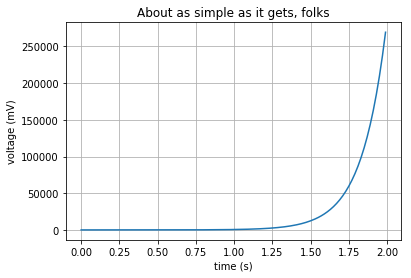

In [6]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.exp(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show()